# Machine Learning Analysis in the Earth Systems Sciences


In this module, you are tasked with planning, implementing, and evaluating a machine learning solution for a real-world scenario. Given pre-configured code blocks and prepared data, you will create a problem statement, explore the data, experiment with model development, and ultimately make a recommendation on the utility of machine learning for your scenario.
To get started, first run the cell below to prepare this notebook. While that process runs, watch the following video to learn more about this scenario.

# Missing weather station in western North Carolina

Play the below video to learn about the situation.

`<video>`

`link to transcript`

## Part 1: Problem Framing

Based on the information provided in the video, which type of machine learning analysis is most appropriate for this scenario?

In [4]:
import ipywidgets as widgets
from IPython.display import display, clear_output

In [3]:
classification_button = widgets.Button(
   description='Classification',
   style={'button_color': '#4CAF50'},
   layout=widgets.Layout(width='200px', margin='10px')
)

regression_button = widgets.Button(
   description='Regression',
   style={'button_color': '#2196F3'},
   layout=widgets.Layout(width='200px', margin='10px')
)

def classification_clicked(b):
   clear_output(wait=True)
   display(buttons)
   print("Classification tasks work for scenarios\n"
         "that require classifying data into\n"
         "categories. This task needs a numerical\n"
         "value for output, and therefore requires\n"
         "a different approach.")
   
def regression_clicked(b):
   clear_output(wait=True)
   display(buttons)
   print("Correct, this scenario requires a\n"
         "numerical output, so we will use a\n"
         "regression algorithm for this scenario.")

classification_button.on_click(classification_clicked)
regression_button.on_click(regression_clicked)

buttons = widgets.HBox([classification_button, regression_button])
display(buttons)

Correct, this scenario requires a
numerical output, so we will use a
regression algorithm for this scenario.


As a part of the problem framing step, we answer a series of questions to ensure we're creating the best solution for this scenario. 

***Does a simpler solution exist?***
> From the video, we know that you have already completed a preliminary analysis that showed that a bias correction using simple math was insufficient to fill in the missing data. At this point, your supervisor is suggesting to trial a machine learning model.

***Can machine learning requirements be met?***
> The NC ECONet data provider has decades of hourly data available from several weather stations. This is sufficient for your model. 

***Which scientific question should be answered?***
> You will answer this question in your Machine Learning Model Handbook in Exercise 1.

<div class="alert alert-success" role="alert">
<p class="admonition-title" style="font-weight:bold">Exercise 1</p>
    <p>In your <b>Machine Learning Model Handbook</b>, type the scientific question to be answered for this situation.</p>
    <p>GENERAL RUBRIC TBD</p>
</div>

## Part 2: Data Handling

### Part 2a: Locate Data of Interest

You will be using other stations in the <a href="https://econet.climate.ncsu.edu/" target="blank">NC ECONet</a> for this project. Your colleague is a <a href="https://www.mongodb.com/resources/basics/data-engineering#what-is-data-engineering" target="blank">data engineer</a> who has done much of the data preparation for you. They have prepared the following document to describe the nature of the dataset they are providing you for your model building work. 

<div class="alert alert-info" role="alert">

### Metadata Document for Western North Carolina Weather Station Data

#### General Information

Dataset Name: Western NC Weather Station Time-Series Data

Description: This dataset contains tabular time-series data collected from multiple weather stations in Western North Carolina. The data includes atmospheric and environmental variables recorded at hourly intervals.

Date Range: January 1, 2015, to December 16, 2024

Geographic Coverage: Western North Carolina 

Data Frequency: Hourly

Last Updated: Jan 1, 2025

#### Data Structure

File Format: .parquet

Number of Records: 69,760 per station per feature

Columns (Features) 

- observation_datetime: Date and time of observation in <UTC?>
- date: 
- day_index: 
- hour_index: 
- year_index: 

Columns (features) per Station (XXXX):

- XXXX_airtemp_degF (°F): Air temperature measured at 2 meters above ground level
- XXXX_windspeed_mph (mph): Average wind speed during the hour at <2? 6? 10?> meters above ground level
- XXXX_winddgust_mph (mph): <Peak wind gust during the hour at <2?> meters above ground level>
- XXXX_rh_percent (%): Relative humidity
- XXXX_precip_in (in): Total precipitation accumulated in the hour at <1? 2?> meters above ground level <need snow equivalent info>

Stations:

- BEAR (Bearwallow Mountain)
- BURN (Burnsville Tower)
- FRYI (Frying Pan Mountain)
- JEFF (Mount Jefferson Tower)
- **MITC (Mount Mitchell State Park) - target station**
- NCAT (North Carolina A&T University Research Farm)
- SALI (Piedmont Research Station)
- SASS (Sassafrass Mountain)
- UNCA (University of North Carolina - Asheville Weather Tower)
- WINE (Wayah Bald Mountain)

<a href="https://econet.climate.ncsu.edu/" target="blank">More station info</a>

#### Data Quality

Missing Data: Timestamps with no recorded data are marked as <>. <Other info about hanling missing data>

Outlier Handling: <outside range handling>

#### Data Provenance

Source: North Carolina State Climate Office ECONet, <a href="https://econet.climate.ncsu.edu" target="blank">https://econet.climate.ncsu.edu/about/</a>

#### Data Transformations

Time Normalization: <?>

Unit Conversion: <?>

Aggregations: <?>
</div>

### Part 2b: Explore Data

While your data engineer colleague prepared the data for your model and created the metadata document, you will still need to familiarize yourself with the data before you use it as input to a machine learning algorithm. In this step, you will take a closer look at the potential features for your model with a few tables and plots. 

First, let's read the data into this workspace.

In [10]:
# Import the Python library that can interpret the data
import pandas as pd

# Location of the data on the remote server
file_path = "processed_data/NC_processed_data_1_2.parquet"

# Read data into this workspace
df = pd.read_parquet(file_path) 

The ***target features*** (the features that we are trying to predict with the machine learning model) are temperature, relative humidity, wind speed, wind gust, and precipitation at the Mt. Mitchell station. All other features are possible ***input features*** to the model. 

Let's now explore just the target features at Mt. Mitchell. Select the environmental variable and plot type from the dropdowns, then select Plot to reveal the plot. 

In [2]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# Variable dropdown
var_dropdown = widgets.Dropdown(
    options=[
        ('Temperature (F)', 'MITC_airtemp_degF'),
        ('Average Wind Speed (mph)', 'MITC_windspeed_mph'),
        ('Wind Gust (mph)', 'MITC_winddgust_mph'),
        ('Relative Humidity (%)', 'MITC_rh_percent'),
        ('Precipitation (in)', 'MITC_precip_in')
    ],
    description='Variable:',
    disabled=False
)

# Plot type dropdown
plot_dropdown = widgets.Dropdown(
    options=['Histogram', 'Time Series'],
    description='Plot type:',
    disabled=False
)

# Button for plotting
plot_button = widgets.Button(description="Plot", button_style="success")

# Output widget to render plots
output = widgets.Output()

# Display widgets and output
display(widgets.HTML(value="<h3>Mt. Mitchell</h3>"), var_dropdown, plot_dropdown, plot_button, output)

# Button click event handler
def on_plot_button_click(b):
    # Retrieve current selections
    var_value = var_dropdown.value
    var_label = var_dropdown.label

    # Clear previous output
    with output:
        clear_output(wait=True)  # Clear the previous plot

        # Generate the selected plot
        if plot_dropdown.value == 'Histogram':
            fig, ax = plt.subplots(1, 1, tight_layout=True)
            ax.hist(df[var_dropdown.value], bins=30, color='skyblue', edgecolor='black')
            ax.set_title(f"Histogram of {var_dropdown.label} at Mt. Mitchell (MITC)", fontsize=14)
            ax.set_xlabel(var_dropdown.label)
            ax.set_ylabel("Number of records")
            plt.show()
        elif plot_dropdown.value == 'Time Series':
            fig, ax = plt.subplots(1, 1, tight_layout=True)
            ax.plot(df['observation_datetime'][::100], df[var_dropdown.value][::100], label=var_dropdown.label, color='orange')
            ax.set_title(f"Time Series of {var_dropdown.label} at Mt. Mitchell (MITC)", fontsize=14)
            ax.set_xlabel("Date")
            ax.set_ylabel(var_dropdown.label)
            plt.show()

# Attach the event handler to the button
plot_button.on_click(on_plot_button_click)

HTML(value='<h3>Mt. Mitchell</h3>')

Dropdown(description='Variable:', options=(('Temperature (F)', 'MITC_airtemp_degF'), ('Average Wind Speed (mph…

Dropdown(description='Plot type:', options=('Histogram', 'Time Series'), value='Histogram')

Button(button_style='success', description='Plot', style=ButtonStyle())

Output()

Now explore the ***input features***. First select a station, variable, and type of plot, then select Plot to reveal the plot. 

To copy an image for pasting into your handbook, hold shift and right click on the image, then select Copy.

<div class="alert alert-info" role="alert">
<p class="admonition-title" style="font-weight:bold">Note</p>
	<p>The machine learning algorithm will treat each station + environmental variable pair as a unique feature, i.e. <code>BURN_airtemp_degF</code> is a different feature than <code>SASS_airtemp_degF</code>.</p>
</div>

In [5]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# Variable dropdown
var_dropdown = widgets.Dropdown(
    options=[
        ('Temperature (F)', 'airtemp_degF'),
        ('Average Wind Speed (mph)', 'windspeed_mph'),
        ('Wind Gust (mph)', 'winddgust_mph'),
        ('Relative Humidity (%)', 'rh_percent'),
        ('Precipitation (in)', 'precip_in')
    ],
    description='Variable:',
    disabled=False
)

# Plot type dropdown
plot_dropdown = widgets.Dropdown(
    options=['Histogram', 'Time Series'],
    description='Plot type:',
    disabled=False
)

# Station dropdown
station_dropdown = widgets.Dropdown(
    options=['BEAR', 'BURN', 'FRYI', 'JEFF', 'NCAT', 'SALI', 'SASS', 'UNCA', 'WINE'],
    description='Station:',
    disabled=False
)

# Button for plotting
plot_button = widgets.Button(description="Plot", button_style="success")

# Output widget to render plots
output = widgets.Output()

# Display widgets and output
display(widgets.HTML(value="<h3>Input Stations</h3>"), station_dropdown, var_dropdown, plot_dropdown, plot_button, output)

# Button click event handler
def on_plot_button_click(b):
    # Retrieve current selection
    selected_var = f"{station_dropdown.value}_{var_dropdown.value}"

    # Clear previous output
    with output:
        clear_output(wait=True)  # Clear the previous plot

        # Generate the selected plot
        if plot_dropdown.value == 'Histogram':
            fig, ax = plt.subplots(1, 1, tight_layout=True)
            ax.hist(df[selected_var], bins=30, color='skyblue', edgecolor='black')
            ax.set_title(f"Histogram of {var_dropdown.label} at {station_dropdown.value}", fontsize=14)
            ax.set_xlabel(var_dropdown.label)
            ax.set_ylabel("Number of records")
            plt.show()
        elif plot_dropdown.value == 'Time Series':
            fig, ax = plt.subplots(1, 1, tight_layout=True)
            ax.plot(df['observation_datetime'][::100], df[selected_var][::100], label=var_dropdown.label, color='orange')
            ax.set_title(f"Time Series of {var_dropdown.label} at {station_dropdown.value}", fontsize=14)
            ax.set_xlabel("Date")
            ax.set_ylabel(var_dropdown.label)
            plt.show()

# Attach the event handler to the button
plot_button.on_click(on_plot_button_click)


HTML(value='<h3>Input Stations</h3>')

Dropdown(description='Station:', options=('BEAR', 'BURN', 'FRYI', 'JEFF', 'NCAT', 'SALI', 'SASS', 'UNCA', 'WIN…

Dropdown(description='Variable:', options=(('Temperature (F)', 'airtemp_degF'), ('Average Wind Speed (mph)', '…

Dropdown(description='Plot type:', options=('Histogram', 'Time Series'), value='Histogram')

Button(button_style='success', description='Plot', style=ButtonStyle())

Output()

<div class="alert alert-success" role="alert">
<p class="admonition-title" style="font-weight:bold">Exercise 2b</p>
    <p>In your <b>Machine Learning Model Handbook</b>, describe your exploratory data analysis of any target and input features of note. Include the following:
    <ul>
        <li>Do variables follow diurnal or annual patterns generally as expected?</li>
        <li>Do the variables have the expected ranges of values? Do any variables appear to include major outliers?</li>
        <li>Are there any features in any stations that look incorrect?</li>
        <li>Which stations appear to be most correlated to the variables at Mt Mitchell?</li>
        <li>Include any important plots. <i>To copy a plot image, hold shift, right click on the image, then select Copy.</i></li>
    </ul>
    </p>
    <p>GENERAL RUBRIC TBD</p>
</div>

### Part 2c: Create a data splitting strategy

Next we create a data splitting strategy. Data splitting refers to the process of dividing data into three groups: training, validation, and testing. Each of these groups represent a part of the iterative process for machine learning model development. 

- Training data is the largest subset, usually around 60-80% of the total data, and is used to initially train the model. 
- Validation data is roughly 10-20% of the total data, and is used to validate the effectiveness of the training process. 
- Testing data is also roughly 10-20% of the total data, and is used to test the final refined model before using it on new, unseen data.

Each group should be separate to ensure no single group will bias the model. In this model, the data will be randomly split into these groups, but you decide the proportions of data for each group. Input your percentages in the blanks below, ensuring all percentages equal 100%.

In [9]:
def create_percentage_widget():
    # Create text widgets for percentages
    training = widgets.BoundedIntText(
        value=0,
        min=0,
        max=100,
        description='Training %:',
        layout=widgets.Layout(width='200px')
    )
    
    testing = widgets.BoundedIntText(
        value=0,
        min=0,
        max=100,
        description='Testing %:',
        layout=widgets.Layout(width='200px')
    )
    
    validation = widgets.BoundedIntText(
        value=0,
        min=0,
        max=100,
        description='Validation %:',
        layout=widgets.Layout(width='200px')
    )
    
    output = widgets.Output()
    
    def check_percentages(change):
        with output:
            output.clear_output()
            total = training.value + testing.value + validation.value
      
            print(f"\nTotal: {total}%")
            
            if total == 100:
                print("✓ Perfect! Percentages sum to 100%")
            else:
                print(f"✗ Warning: Percentages sum to {total}%, not 100%")
    
    # Add observers
    training.observe(check_percentages, names='value')
    testing.observe(check_percentages, names='value')
    validation.observe(check_percentages, names='value')
    
    # Layout
    widget_box = widgets.VBox([
        widgets.HTML(value="<h3>Dataset Split Percentages</h3>"),
        training,
        testing,
        validation,
        output
    ])
    
    display(widget_box)
    
    # Return both the widget box and a function to get decimal values
    def get_decimal_values():
        return {
            'training': training.value / 100,
            'testing': testing.value / 100,
            'validation': validation.value / 100
        }
    
    return widget_box, get_decimal_values

widget, get_values = create_percentage_widget()

## Part 3: Model Development
Next begins the iterative process of creating, evaluating, and refining your machine learning model. You will start with an initial model, and keep track of your subsequent trial iterations in your Machine Learning Model Handbook. 
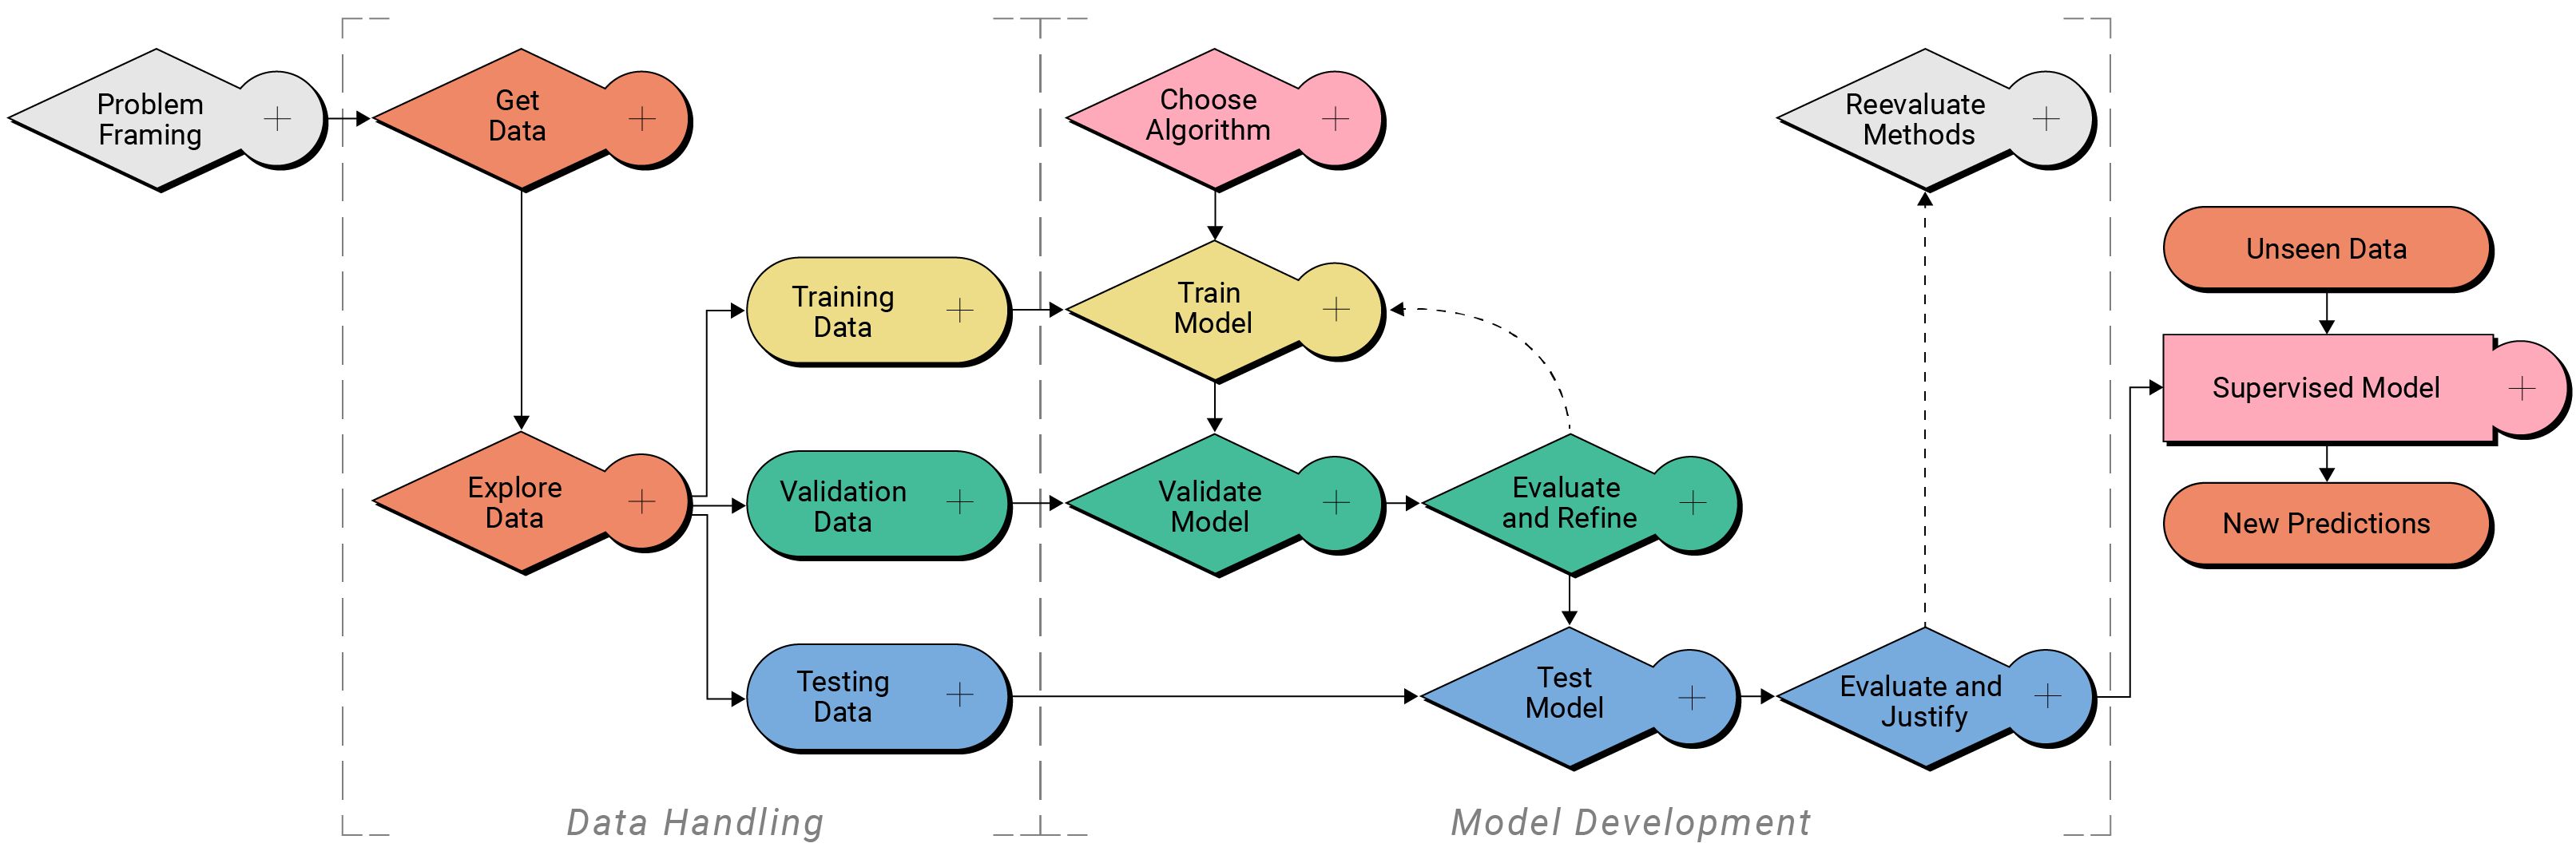

### Part 3a: Choose Algorithm
Is it possible to have them choose algorithm A or B?

In [ ]:
# Initialize the XGBoost model
xgb_model = MultiOutputRegressor(xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
))

### Part 3b: Train the Model
To train, you must select the stations from the selector (and maybe also vars??)

In [9]:
def create_station_selector():
    # List of all stations
    stations = ['BEAR', 'JEFF', 'SASS', 
                'BURN', 'NCAT', 'UNCA',
                'FRYI', 'SALI', 'WINE']
    
    # Create checkbox widgets for each station
    checkboxes = {
        station: widgets.Checkbox(
            value=False,
            description=station,
            disabled=False,
            indent=False
        ) for station in stations
    }
    
    # Create a container for all checkboxes
    checkbox_grid = widgets.GridBox(
        children=[checkboxes[station] for station in stations],
        layout=widgets.Layout(
            grid_template_columns='100px 100px 100px',
        )
    )
    
    # Function to get selected stations
    def get_selected_stations():
        return [station for station, checkbox in checkboxes.items() if checkbox.value]
    
    # Create an output widget to display selected stations
    output = widgets.Output()
    
    # Update function for when checkboxes change
    def on_change(change):
        with output:
            output.clear_output()
            selected = get_selected_stations()
            print(f"Selected stations: {', '.join(selected) if selected else 'None'}")
    
    # Add observers to all checkboxes
    for checkbox in checkboxes.values():
        checkbox.observe(on_change, names='value')
    
    # Display everything
    display(widgets.VBox([
        widgets.HTML(value="<h3>Select Input Stations</h3>"),
        checkbox_grid,
        output
    ]))
    
    return checkboxes

station_selector = create_station_selector


### ADD train BUTTON AFTER STATION SELECTION TO AUTOMATICALLY KICK OFF TRAINING PROCESS 
### RETURN SOME VISUAL CUE TO SAY MODEL IS TRAINED/PROGRESS BAR WIDGET?

### Part 3c: Validate the Model

Kick off validation and print out copy pastable results (printout should include inputs). Paste the results in your handbook.

In [ ]:
# Make predictions
y_pred = xgb_model.predict(X_test_filtered)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = r2_score(y_test, y_pred, multioutput='raw_values')

# Print results
print("Mean Squared Error for each target:")
for target, error in zip(y_test.columns, mse):
    print(f"{target}: {error:.4f}")

print("\nRoot Mean Squared Error for each target:")
for target, error in zip(y_test.columns, rmse):
    print(f"{target}: {error:.4f}")

print("\nR2 Score for each target:")
for target, score in zip(y_test.columns, r2):
    print(f"{target}: {score:.4f}")

# Overall performance
print(f"\nAverage MSE: {np.mean(mse):.2f}")
print(f"Average RMSE: {np.mean(rmse):.2f}")
print(f"Average R2 Score: {np.mean(r2):.2f}")

### Part 3d: Evaluate and Refine the Model

Examine the results of the model validation. What do each mean? Could they be improved? 

<div class="alert alert-success" role="alert">
<p class="admonition-title" style="font-weight:bold">Exercise 3d</p>
    <p>In your <b>Machine Learning Model Handbook</b>, describe the results of your initial model validation. Include the following:
    <ul>
        <li>How do you interpret these results in the context of the real-world situation?</li>
        <li>Potentially how could these metrics be improved in your next iteration? Why?</li>
    </ul>
    </p>
    <p>GENERAL RUBRIC TBD</p>
</div>

### Part 3e: Iterative Testing

Select new stations (and vars??), retrain your model, revalidate your model, reevaluate your model, and repeat until you have results that you are satisfied with.

<div class="alert alert-success" role="alert">
<p class="admonition-title" style="font-weight:bold">Exercise 3e</p>
    <p>In your <b>Machine Learning Model Handbook</b>, paste the full output of each of your validation runs. Include the following:
    <ul>
        <li>The inputs used for each validation.</li>
        <li>The resultant evaluation metrics for each validation.</li>
    </ul>
    </p>
    <p>GENERAL RUBRIC TBD</p>
</div>

In [10]:
# widgets, etc

### Part 3f: Test Model
With your model created with the best results, it's now time to test the model on brand new data, the testing dataset. Select Test below to test the model with these independent data points. 

In [11]:
# Button

### Part 3g: Evaluate and Justify
How do these metrics compare to your validation results?

<div class="alert alert-success" role="alert">
<p class="admonition-title" style="font-weight:bold">Exercise 3g</p>
    <p>In your <b>Machine Learning Model Handbook</b>, describe how your testing metrics compare to your validation metrics. Include the following:
    <ul>
        <li>Did the metrics get better or worse?</li>
        <li>Is this model ready for production deployment? Why or Why not?</li>
        <li>What other possible changes could further improve this model?</li>
    </ul>
    </p>
    <p>GENERAL RUBRIC TBD</p>
</div>

## Some general closer